In [1]:

# importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:

# dataset doesn't have column names, so we have to provide it
columns = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

In [3]:

# importing dataset
data = pd.read_csv('KDDTrain+.txt',header=None, names=columns)

In [ ]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20.0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15.0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19.0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21.0
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [4]:

# remove attribute 'difficulty_level'
data.drop(['difficulty_level'],axis=1,inplace=True)
data.shape

(125973, 42)

In [ ]:

# number of attack labels
data['label'].value_counts()

,count
label,
normal,67343
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


In [5]:
# changing attack labels to their respective attack class
def change_label(df):
    df['label'] = df['label'].replace(['apache2', 'back', 'land', 'neptune', 'mailbomb', 'pod',
                                       'processtable', 'smurf', 'teardrop', 'udpstorm', 'worm'], 'Dos')
    df['label'] = df['label'].replace(['ftp_write', 'guess_passwd', 'httptunnel', 'imap',
                                       'multihop', 'named', 'phf', 'sendmail', 'snmpgetattack',
                                       'snmpguess', 'spy', 'warezclient', 'warezmaster',
                                       'xlock', 'xsnoop'], 'R2L')
    df['label'] = df['label'].replace(['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan'], 'Probe')
    df['label'] = df['label'].replace(['buffer_overflow', 'loadmodule', 'perl', 'ps', 'rootkit',
                                       'sqlattack', 'xterm'], 'U2R')

# calling change_label() function
change_label(data)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:

# number of attack labels
data['label'].value_counts()

,count
label,
normal,67343
Dos,45927
Probe,11656
R2L,995
U2R,52


In [6]:
data = data.dropna()


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target
X = data.drop('label', axis=1)
y = data['label']

# Identify numerical and categorical columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Define transformers for scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

# Transform the dataset
X_processed = preprocessor.fit_transform(X)


In [ ]:
X_processed

array([[-0.11024922, -0.0076786 , -0.00491864, ...,  0.        ,
         1.        ,  0.        ],
       [-0.11024922, -0.00773737, -0.00491864, ...,  0.        ,
         1.        ,  0.        ],
       [-0.11024922, -0.00776224, -0.00491864, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.11024922, -0.00738219, -0.00482315, ...,  0.        ,
         1.        ,  0.        ],
       [-0.11024922, -0.00776224, -0.00491864, ...,  0.        ,
         0.        ,  0.        ],
       [-0.11024922, -0.00773652, -0.00491864, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC

# Initialize the model
svm_model = SVC(kernel='rbf', class_weight='balanced')

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)



In [ ]:
from sklearn.metrics import classification_report


# Evaluate
print(classification_report(y_test, y_pred))


In [ ]:
import pickle

# Assume 'model' is your trained model
with open('network_ids_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

print("Model saved to network_ids_model.pkl")


In [ ]:
def preprocess_input(sample_input, preprocessor):
    # Convert input to DataFrame (assuming sample_input is a list or array)
    df_input = pd.DataFrame([sample_input], columns=[
        'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
        'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
        'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
        'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
        'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
        'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
        'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
        'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
        'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
        'dst_host_serror_rate', 'dst_host_srv_serror_rate',
        'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'
    ])

    # Use the preprocessor to transform the input
    processed_input = preprocessor.transform(df_input)

    return processed_input
def predict_sample(sample_input, model, preprocessor):
    # Preprocess the input
    processed_input = preprocess_input(sample_input, preprocessor)

    # Make prediction
    prediction = model.predict(processed_input)

    return prediction[0]  # Return the predicted class
# Example input (adjust values according to your feature set)
sample_input = [
0,"tcp","iso_tsap","S0",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,6,1.00,1.00,0.00,0.00,0.02,0.06,0.00,255,6,0.02,0.06,0.00,0.00,1.00,1.00,0.00,0.00]

# Use the loaded model and preprocessor to predict
predicted_label = predict_sample(sample_input, svm_model, preprocessor)
print(f"Predicted label: {predicted_label}")


Predicted label: Dos


next iteration

Selected Features: Index(['wrong_fragment', 'logged_in', 'count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')


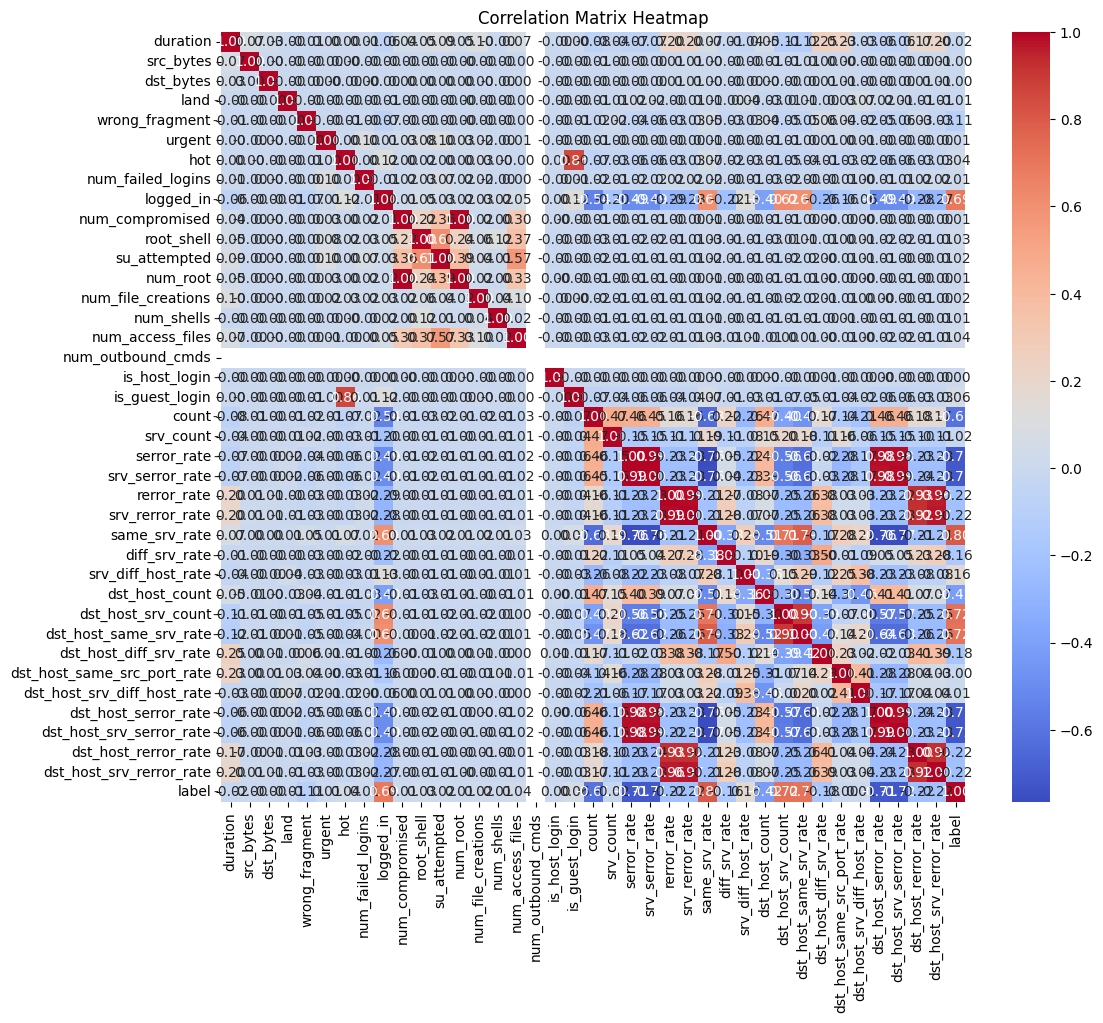

In [ ]:
num_data = data.select_dtypes(include=['int64', 'float64']).copy()

# Convert 'label' column to numerical using Label Encoding
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])

# Add the encoded label to num_data
num_data['label'] = data['label_encoded']

# Compute the Pearson correlation matrix
correlation_matrix = num_data.corr()

# Set a correlation threshold (e.g., 0.1)
threshold = 0.1

# Identify columns with correlation above the threshold with the target 'label'
# Calculating correlation between numerical features and the label
label_correlation = correlation_matrix['label'].drop('label')
selected_features = label_correlation[abs(label_correlation) > threshold].index

# Print selected features based on the threshold
print("Selected Features:", selected_features)

# Plotting the heatmap for visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import pickle

# Load your dataset
# data = pd.read_csv('your_data.csv')  # Uncomment this to load your dataset

# Convert categorical labels to numeric
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])

# Save LabelEncoder separately
with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)


# Separate features and target
X = data.drop(['label', 'label_encoded'], axis=1)
y = data['label_encoded']

# Identify numerical and categorical columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

# Create the pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

         Dos       1.00      1.00      1.00      9181
       Probe       1.00      1.00      1.00      2357
         R2L       1.00      0.96      0.98       224
         U2R       1.00      0.27      0.43        11
      normal       1.00      1.00      1.00     13422

    accuracy                           1.00     25195
   macro avg       1.00      0.85      0.88     25195
weighted avg       1.00      1.00      1.00     25195



In [ ]:
# prompt: help me put pipeline in pkl file

# Save the pipeline to a pickle file
with open('network_ids_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

print("Pipeline saved to network_ids_pipeline.pkl")

Pipeline saved to network_ids_pipeline.pkl


In [ ]:
import numpy as np
import pandas as pd
import pickle

# Load the saved pipeline (including preprocessor and classifier)
with open('network_ids_pipeline.pkl', 'rb') as file:
    pipeline = pickle.load(file)

# Define the prediction function
def predict_network_traffic(raw_input):
    """
    Processes raw input data, runs it through the pipeline, and predicts the label.

    Parameters:
    raw_input (str): Comma-separated feature values

    Returns:
    str: Predicted label (e.g., 'Dos', 'Probe', 'R2L', 'U2R', 'normal')
    """
    # Define the feature columns as in the original dataset
    columns = [
        'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
        'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
        'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
        'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
        'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
        'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
        'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
        'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
        'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'
    ]

    # Convert the raw input string into a list of values
    input_values = raw_input.split(',')

    # Create a DataFrame with a single row of input values and columns
    input_df = pd.DataFrame([input_values], columns=columns)

    # Use the pipeline to preprocess and predict in one step
    prediction_encoded = pipeline.predict(input_df)

    # Decode the prediction to the original label name
    predicted_label = label_encoder.inverse_transform([prediction_encoded[0]])

    return predicted_label[0]

# Example usage
# sample_input = '0,udp,other,SF,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,400,1,0.00,0.00,0.00,0.00,0.00,1.00,0.00,255,1,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00'
# probe
# sample_input = '0,tcp,ctf,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,245,5,0.00,0.00,1.00,1.00,0.02,0.06,0.00,255,5,0.02,0.07,0.00,0.00,0.00,0.00,1.00,1.00'
# dos
sample_input = "0,icmp,ecr_i,SF,1480,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1,25,1.00,0.00,1.00,0.52,0.00,0.00,0.00,0.00"

predicted_label = predict_network_traffic(sample_input)
print("Predicted Label:", predicted_label)


Predicted Label: Dos


https://www.kaggle.com/datasets/hassan06/nslkdd?select=KDDTest-21.txt
yaaha se koi bhi data uthayo , last ki 2 colums udado kyuki voh result hai and check karo result

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import pickle
import pandas as pd


# Convert categorical labels to numeric
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])

# Separate features and target
X = data.drop(['label', 'label_encoded'], axis=1)
y = data['label_encoded']

# Identify numerical and categorical columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

# Create a single pipeline with SMOTE and RandomForest
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit the entire pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Save the entire pipeline and label encoder
with open('model_pipeline.pkl', 'wb') as f:
    pickle.dump((pipeline, label_encoder), f)

              precision    recall  f1-score   support

         Dos       1.00      1.00      1.00      9186
       Probe       1.00      1.00      1.00      2331
         R2L       0.97      0.97      0.97       199
         U2R       0.89      0.80      0.84        10
      normal       1.00      1.00      1.00     13469

    accuracy                           1.00     25195
   macro avg       0.97      0.95      0.96     25195
weighted avg       1.00      1.00      1.00     25195



In [ ]:
import pandas as pd
import pickle

def predict_network_traffic(raw_input):
    """
    Processes raw input data, runs it through the pipeline, and predicts the label.

    Parameters:
    raw_input (str): Comma-separated feature values

    Returns:
    str: Predicted label (e.g., 'Dos', 'Probe', 'R2L', 'U2R', 'normal')
    """
    # Define the feature columns as in the original dataset
    columns = [
        'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
        'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
        'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
        'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
        'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
        'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
        'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
        'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
        'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'
    ]

    # Convert the raw input string into a list of values
    input_values = raw_input.split(',')

    # Create a DataFrame with a single row of input values and columns
    input_df = pd.DataFrame([input_values], columns=columns)

    # Load the saved pipeline and label encoder
    with open('model_pipeline.pkl', 'rb') as file:
        loaded_pipeline, label_encoder = pickle.load(file)

    # Use the loaded pipeline to make a prediction
    prediction = loaded_pipeline.predict(input_df)

    # Decode the predicted label
    predicted_label = label_encoder.inverse_transform(prediction)

    return predicted_label[0]  # Return the predicted label

# Example usage
sample_input = "0,tcp,login,RSTO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,140,2,0.00,0.00,1.00,1.00,0.01,0.06,0.00,255,2,0.01,0.06,0.00,0.00,0.00,0.00,1.00,1.00"
predicted_label = predict_network_traffic(sample_input)
print("Predicted Label:", predicted_label)


Predicted Label: Dos


optimum prime

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Assuming 'data' is your DataFrame
# Convert categorical labels to numeric
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])

# Separate features and target
X = data.drop(['label', 'label_encoded'], axis=1)
y = data['label_encoded']

# Identify numerical and categorical columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Define the preprocessing steps, including imputation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean for numeric features
            ('scaler', StandardScaler())  # Standardize numeric features
        ]), num_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value for categorical features
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), cat_features)
    ])

# Create a pipeline with SMOTE, imputation, and Logistic Regression
pipeline_lr = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit the pipeline on the training data
pipeline_lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline_lr.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Save the entire pipeline and label encoder
with open('model_pipeline_lr.pkl', 'wb') as f:
    pickle.dump((pipeline_lr, label_encoder), f)


              precision    recall  f1-score   support

         Dos       1.00      1.00      1.00      2024
       Probe       0.94      0.98      0.96       505
         R2L       0.34      0.89      0.49        47
         U2R       0.14      1.00      0.25         3
      normal       0.99      0.95      0.97      2951

    accuracy                           0.97      5530
   macro avg       0.68      0.96      0.73      5530
weighted avg       0.98      0.97      0.98      5530



In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
from sklearn.model_selection import train_test_split


# Assuming 'data' is your DataFrame
# Convert categorical labels to numeric
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])

# Separate features and target
X = data.drop(['label', 'label_encoded'], axis=1)
y = data['label_encoded']

# Identify numerical and categorical columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean for numeric features
            ('scaler', StandardScaler())  # Standardize numeric features
        ]), num_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value for categorical features
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), cat_features)
    ])

# Create a pipeline with Gradient Boosting
pipeline_gb = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Fit the pipeline on the training data
pipeline_gb.fit(X_train, y_train)

# Make predictions
y_pred_gb = pipeline_gb.predict(X_test)

# Evaluate the model
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb, target_names=label_encoder.classes_))

# Save the Gradient Boosting pipeline
with open('gb_pipeline.pkl', 'wb') as f:
    pickle.dump((pipeline_gb, label_encoder), f)


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

         Dos       1.00      1.00      1.00      9186
       Probe       0.99      1.00      0.99      2331
         R2L       0.78      0.97      0.86       199
         U2R       0.21      1.00      0.34        10
      normal       1.00      0.99      1.00     13469

    accuracy                           0.99     25195
   macro avg       0.80      0.99      0.84     25195
weighted avg       1.00      0.99      1.00     25195



NameError: name 'pickle' is not defined

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean for numeric features
            ('scaler', StandardScaler())  # Standardize numeric features
        ]), num_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value for categorical features
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), cat_features)
    ])

# Create a pipeline with KNN
pipeline_knn = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier())
])

# Fit the pipeline on the training data
pipeline_knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = pipeline_knn.predict(X_test)

# Evaluate the model
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_))

# Save the KNN pipeline
with open('knn_pipeline.pkl', 'wb') as f:
    pickle.dump((pipeline_knn, label_encoder), f)


KNN Classification Report:
              precision    recall  f1-score   support

         Dos       1.00      1.00      1.00      2024
       Probe       0.98      0.99      0.99       505
         R2L       0.85      0.94      0.89        47
         U2R       0.33      1.00      0.50         3
      normal       1.00      0.99      0.99      2951

    accuracy                           0.99      5530
   macro avg       0.83      0.98      0.87      5530
weighted avg       0.99      0.99      0.99      5530



In [ ]:
import pandas as pd
import pickle
from sklearn.metrics import classification_report

# Load the test data (assuming the test data is already preprocessed)
columns = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

# Load the test data
testdata = pd.read_csv('KDDTest+.txt', header=None, names=columns)
testdata.drop(['difficulty_level'], axis=1, inplace=True)

# Function to change labels
def change_label(df):
    df['label'] = df['label'].replace(['apache2', 'back', 'land', 'neptune', 'mailbomb', 'pod',
                                       'processtable', 'smurf', 'teardrop', 'udpstorm', 'worm'], 'Dos')
    df['label'] = df['label'].replace(['ftp_write', 'guess_passwd', 'httptunnel', 'imap',
                                       'multihop', 'named', 'phf', 'sendmail', 'snmpgetattack',
                                       'snmpguess', 'spy', 'warezclient', 'warezmaster',
                                       'xlock', 'xsnoop'], 'R2L')
    df['label'] = df['label'].replace(['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan'], 'Probe')
    df['label'] = df['label'].replace(['buffer_overflow', 'loadmodule', 'perl', 'ps', 'rootkit',
                                       'sqlattack', 'xterm'], 'U2R')

# Calling change_label() function on test data
change_label(testdata)

# Separate features and target variable
X_test = testdata.drop('label', axis=1)
y_test = testdata['label']

# Load the pre-trained model and label encoder
with open('gb_pipeline.pkl', 'rb') as f:
    pipeline, label_encoder = pickle.load(f)

# Ensure that the labels in the test data match the labels in the label encoder
# Encode the labels in the test set according to the label encoder
y_test_encoded = label_encoder.transform(y_test)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Print the classification report
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

         Dos       0.96      0.83      0.89      7460
       Probe       0.82      0.65      0.72      2421
         R2L       0.78      0.17      0.28      2885
         U2R       0.71      0.18      0.29        67
      normal       0.70      0.97      0.81      9711

    accuracy                           0.78     22544
   macro avg       0.79      0.56      0.60     22544
weighted avg       0.81      0.78      0.76     22544



In [ ]:
import pandas as pd
import pickle
from sklearn.metrics import classification_report

# Load the test data (assuming the test data is already preprocessed)
columns = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

# Load the test data
testdata = pd.read_csv('KDDTest+.txt', header=None, names=columns)
testdata.drop(['difficulty_level'], axis=1, inplace=True)

# Function to change labels
def change_label(df):
    df['label'] = df['label'].replace(['apache2', 'back', 'land', 'neptune', 'mailbomb', 'pod',
                                       'processtable', 'smurf', 'teardrop', 'udpstorm', 'worm'], 'Dos')
    df['label'] = df['label'].replace(['ftp_write', 'guess_passwd', 'httptunnel', 'imap',
                                       'multihop', 'named', 'phf', 'sendmail', 'snmpgetattack',
                                       'snmpguess', 'spy', 'warezclient', 'warezmaster',
                                       'xlock', 'xsnoop'], 'R2L')
    df['label'] = df['label'].replace(['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan'], 'Probe')
    df['label'] = df['label'].replace(['buffer_overflow', 'loadmodule', 'perl', 'ps', 'rootkit',
                                       'sqlattack', 'xterm'], 'U2R')

# Calling change_label() function on test data
change_label(testdata)

# Separate features and target variable
X_test = testdata.drop('label', axis=1)
y_test = testdata['label']

# Load the pre-trained model and label encoder
with open('knn_pipeline.pkl', 'rb') as f:
    pipeline, label_encoder = pickle.load(f)

# Ensure that the labels in the test data match the labels in the label encoder
# Encode the labels in the test set according to the label encoder
y_test_encoded = label_encoder.transform(y_test)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Print the classification report
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

         Dos       0.96      0.78      0.86      7460
       Probe       0.79      0.71      0.75      2421
         R2L       0.83      0.17      0.29      2885
         U2R       0.68      0.34      0.46        67
      normal       0.69      0.97      0.80      9711

    accuracy                           0.77     22544
   macro avg       0.79      0.59      0.63     22544
weighted avg       0.81      0.77      0.75     22544



In [ ]:
import pandas as pd
import pickle
from sklearn.metrics import classification_report

# Load the test data (assuming the test data is already preprocessed)
columns = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

# Load the test data
testdata = pd.read_csv('KDDTest+.txt', header=None, names=columns)
testdata.drop(['difficulty_level'], axis=1, inplace=True)

# Function to change labels
def change_label(df):
    df['label'] = df['label'].replace(['apache2', 'back', 'land', 'neptune', 'mailbomb', 'pod',
                                       'processtable', 'smurf', 'teardrop', 'udpstorm', 'worm'], 'Dos')
    df['label'] = df['label'].replace(['ftp_write', 'guess_passwd', 'httptunnel', 'imap',
                                       'multihop', 'named', 'phf', 'sendmail', 'snmpgetattack',
                                       'snmpguess', 'spy', 'warezclient', 'warezmaster',
                                       'xlock', 'xsnoop'], 'R2L')
    df['label'] = df['label'].replace(['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan'], 'Probe')
    df['label'] = df['label'].replace(['buffer_overflow', 'loadmodule', 'perl', 'ps', 'rootkit',
                                       'sqlattack', 'xterm'], 'U2R')

# Calling change_label() function on test data
change_label(testdata)

# Separate features and target variable
X_test = testdata.drop('label', axis=1)
y_test = testdata['label']

# Load the pre-trained model and label encoder
with open('model_pipeline_lr.pkl', 'rb') as f:
    pipeline, label_encoder = pickle.load(f)

# Ensure that the labels in the test data match the labels in the label encoder
# Encode the labels in the test set according to the label encoder
y_test_encoded = label_encoder.transform(y_test)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Print the classification report
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

         Dos       0.91      0.84      0.88      7460
       Probe       0.84      0.74      0.79      2421
         R2L       0.78      0.25      0.38      2885
         U2R       0.39      0.42      0.40        67
      normal       0.71      0.91      0.80      9711

    accuracy                           0.78     22544
   macro avg       0.73      0.63      0.65     22544
weighted avg       0.80      0.78      0.77     22544



In [ ]:
import pandas as pd
import pickle
from sklearn.metrics import classification_report

# Load the test data (assuming the test data is already preprocessed)
columns = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

# Load the test data
testdata = pd.read_csv('KDDTest+.txt', header=None, names=columns)
testdata.drop(['difficulty_level'], axis=1, inplace=True)

# Function to change labels
def change_label(df):
    df['label'] = df['label'].replace(['apache2', 'back', 'land', 'neptune', 'mailbomb', 'pod',
                                       'processtable', 'smurf', 'teardrop', 'udpstorm', 'worm'], 'Dos')
    df['label'] = df['label'].replace(['ftp_write', 'guess_passwd', 'httptunnel', 'imap',
                                       'multihop', 'named', 'phf', 'sendmail', 'snmpgetattack',
                                       'snmpguess', 'spy', 'warezclient', 'warezmaster',
                                       'xlock', 'xsnoop'], 'R2L')
    df['label'] = df['label'].replace(['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan'], 'Probe')
    df['label'] = df['label'].replace(['buffer_overflow', 'loadmodule', 'perl', 'ps', 'rootkit',
                                       'sqlattack', 'xterm'], 'U2R')

# Calling change_label() function on test data
change_label(testdata)

# Separate features and target variable
X_test = testdata.drop('label', axis=1)
y_test = testdata['label']

# Load the pre-trained model and label encoder
with open('network_ids_pipeline.pkl', 'rb') as f:
    pipeline = pickle.load(f)

# Ensure that the labels in the test data match the labels in the label encoder
# Encode the labels in the test set according to the label encoder
y_test_encoded = label_encoder.transform(y_test)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Print the classification report
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

         Dos       0.96      0.78      0.86      7460
       Probe       0.85      0.60      0.70      2421
         R2L       0.98      0.04      0.07      2885
         U2R       0.50      0.04      0.08        67
      normal       0.64      0.97      0.78      9711

    accuracy                           0.75     22544
   macro avg       0.79      0.49      0.50     22544
weighted avg       0.81      0.75      0.70     22544



now making gradient boost more better

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import pickle

# Separate features and target
X = data.drop(['label', 'label_encoded'], axis=1)
y = data['label_encoded']

# Identify numerical and categorical columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), num_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_features)
    ])

# Create the Gradient Boosting pipeline with preprocessing and SMOTE
pipeline_gb = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),  # Standard SMOTE for balancing
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline_gb, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters from GridSearchCV
print(f"Best hyperparameters: {grid_search.best_params_}")

# Cross-validation evaluation
cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {cv_scores.mean()} (+/- {cv_scores.std()})")

# Evaluate the model on test data
y_pred_gb = grid_search.best_estimator_.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Save the trained pipeline for future use
with open('optimized_gb_pipeline.pkl', 'wb') as f:
    pickle.dump(grid_search.best_estimator_, f)


Fitting 3 folds for each of 243 candidates, totalling 729 fits


KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import pickle
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Load your data and pre-trained pipeline (adjust file paths as needed)
with open('gb_pipeline.pkl', 'rb') as f:
    pipeline, label_encoder = pickle.load(f)

# Assuming you have your data loaded as X and y
data = pd.read_csv('KDDTrain+.txt', header=None, names=columns)
data = data[100:]
data.drop(['difficulty_level'], axis=1, inplace=True)
data.dropna()
change_label(data)
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])
X = data.drop(['label', 'label_encoded'], axis=1)
y = data['label_encoded']

# Identify numerical and categorical columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), num_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_features)
    ])

# Create the Gradient Boosting pipeline with preprocessing and SMOTE
pipeline_gb = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'classifier__n_estimators': [10, 20],  # Reduce the number of estimators
    'classifier__learning_rate': [0.1],  # Fix to one learning rate
    'classifier__max_depth': [3]  # Fix to a single depth level
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline_gb, param_grid, n_jobs=-1, verbose=2)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test set
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

# Save the best pipeline
with open('optimized_gb_pipeline.pkl', 'wb') as f:
    pickle.dump(grid_search.best_estimator_, f)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
